# Data Project - Stock Market Analysis<br>

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:
<ul>
1.) What was the change in price of the stock over time?<br>
2.) What was the daily return of the stock on average?<br>
3.) What was the moving average of the various stocks?<br>
4.) What was the correlation between different stocks' closing prices?<br>
4.) What was the correlation between different stocks' daily returns?<br>
5.) How much value do we put at risk by investing in a particular stock?<br>
6.) How can we attempt to predict future stock behavior?<br>
    </ul>
Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [7]:
# For division
from __future__ import division

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to give us a white grid background
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime


In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
# end time is today.  start is a year ago from today's date

end= datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [11]:
#for every stock in the tech list, call data reader.  it will take  4 arguments - stock ticker, what website, start date and end date.
#globals --> takes that stock ticker and making it into a global variable.  It will allow you to take the string name (AAPL) as the dataframe variable

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [12]:
# example of what globals()[stock] allows you to do.
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221
...,...,...,...,...,...,...
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.720001


In [14]:
# another example of what globals()[stock] allows you to do
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966
2020-01-08,1411.579956,1390.839966,1392.079956,1404.319946,1528000,1404.319946
2020-01-09,1427.329956,1410.270020,1420.569946,1419.829956,1500900,1419.829956
2020-01-10,1434.928955,1418.349976,1427.560059,1429.729980,1820700,1429.729980


In [15]:
#gives you stat summary for AAPL stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,96.979137,94.201488,95.586875,95.645932,1.516446e+08,95.346530
std,22.175833,21.646959,22.105118,21.879341,7.402114e+07,22.023117
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,78.749374,76.744999,77.616251,77.501251,1.036409e+08,77.064070
50%,93.520000,91.493752,92.231251,92.730000,1.359944e+08,92.403690
75%,117.514997,114.344999,116.096874,115.849998,1.830576e+08,115.652969
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.690002


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-06 to 2021-01-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


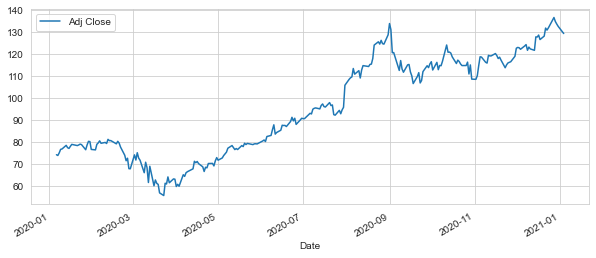

In [17]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

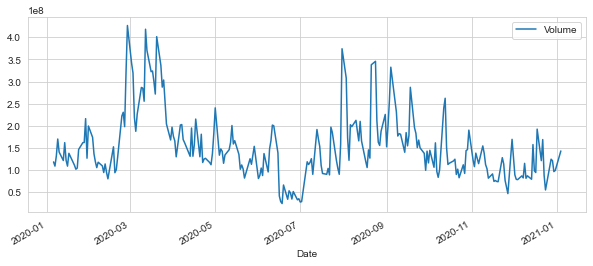

In [18]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [23]:
# moving averages

#going to average over 10 days, 20 days and 50 days
ma_day = [10,20,50]

#creating column name 
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
#creating new column in the AAPL dataframe,   
    AAPL[column_name] = (AAPL['Adj Close'],ma)

ValueError: window must be an integer